In [1]:
import scipy as sp
from scipy import stats
import numpy as np 
import pandas as pd
from FileExporter import create_download_link
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from msresist.mining_bioreplicates import MergeDfbyMean, AvsBacrossCond, AvsBvsCacrossCond

In [2]:
A = pd.read_csv('./msresist/data/20180817_JG_AM_TMT10plex_R1_psms.csv', header=0)
B = pd.read_csv('./msresist/data/20190214_JG_AM_PC9_AXL_TMT10_AC28_R2_PSMs.csv', header=0)
C = pd.read_csv('./msresist/data/CombinedBR3_TR1&2.csv', header=0)

#Data
a, b, c = A.iloc[:, 2:12], B.iloc[:, 2:12], C.iloc[:, 2:12]
t = list(a.columns)

#Peptide Sequences
Aseqs, Bseqs, Cseqs = A.iloc[:, 0], B.iloc[:, 0], C.iloc[:, 0]

#Protein Names 
Anames, Bnames, Cnames = [], [], []
x = list(map(lambda  v : Anames.append(v.split("OS")[0]), A.iloc[:,1]))
y = list(map(lambda  v : Bnames.append(v.split("OS")[0]), B.iloc[:,1]))
z = list(map(lambda  v : Cnames.append(v.split("OS")[0]), C.iloc[:,1]))

A['Master Protein Descriptions'] = Anames
B['Master Protein Descriptions'] = Bnames
C['Master Protein Descriptions'] = Cnames

## Merging Biological Replicates

There are overlapping peptides across all 3 BRs... eg: gSTAENAEyLR-1, qNVPVINITyDSTPEDVk, gSHQISLDNPDyQQDFFPk, ... Same proteins have different descriptions which it's why I'm renaming them to .split("OS")[0]. Note 

In [3]:
# A[A["Master Protein Descriptions"].str.contains("UFO")]

In [4]:
# B[B["Master Protein Descriptions"].str.contains("UFO")]

In [5]:
# C[C["Master Protein Descriptions"].str.contains("UFO")]

In [6]:
ABC_avg = MergeDfbyMean(A,B,C,t)

shape of concatenated matrix: (1496, 12)
total number of recurrences: {2: 246, 1: 620, 3: 128}
shape of averaged matrix: (994, 10)


Note that the shape of ABC_avg is 994:*10*, meaning that the first two rows are not really considered when trying to use them with pandas

## Variability between overlapping peptides across Biological Replicates

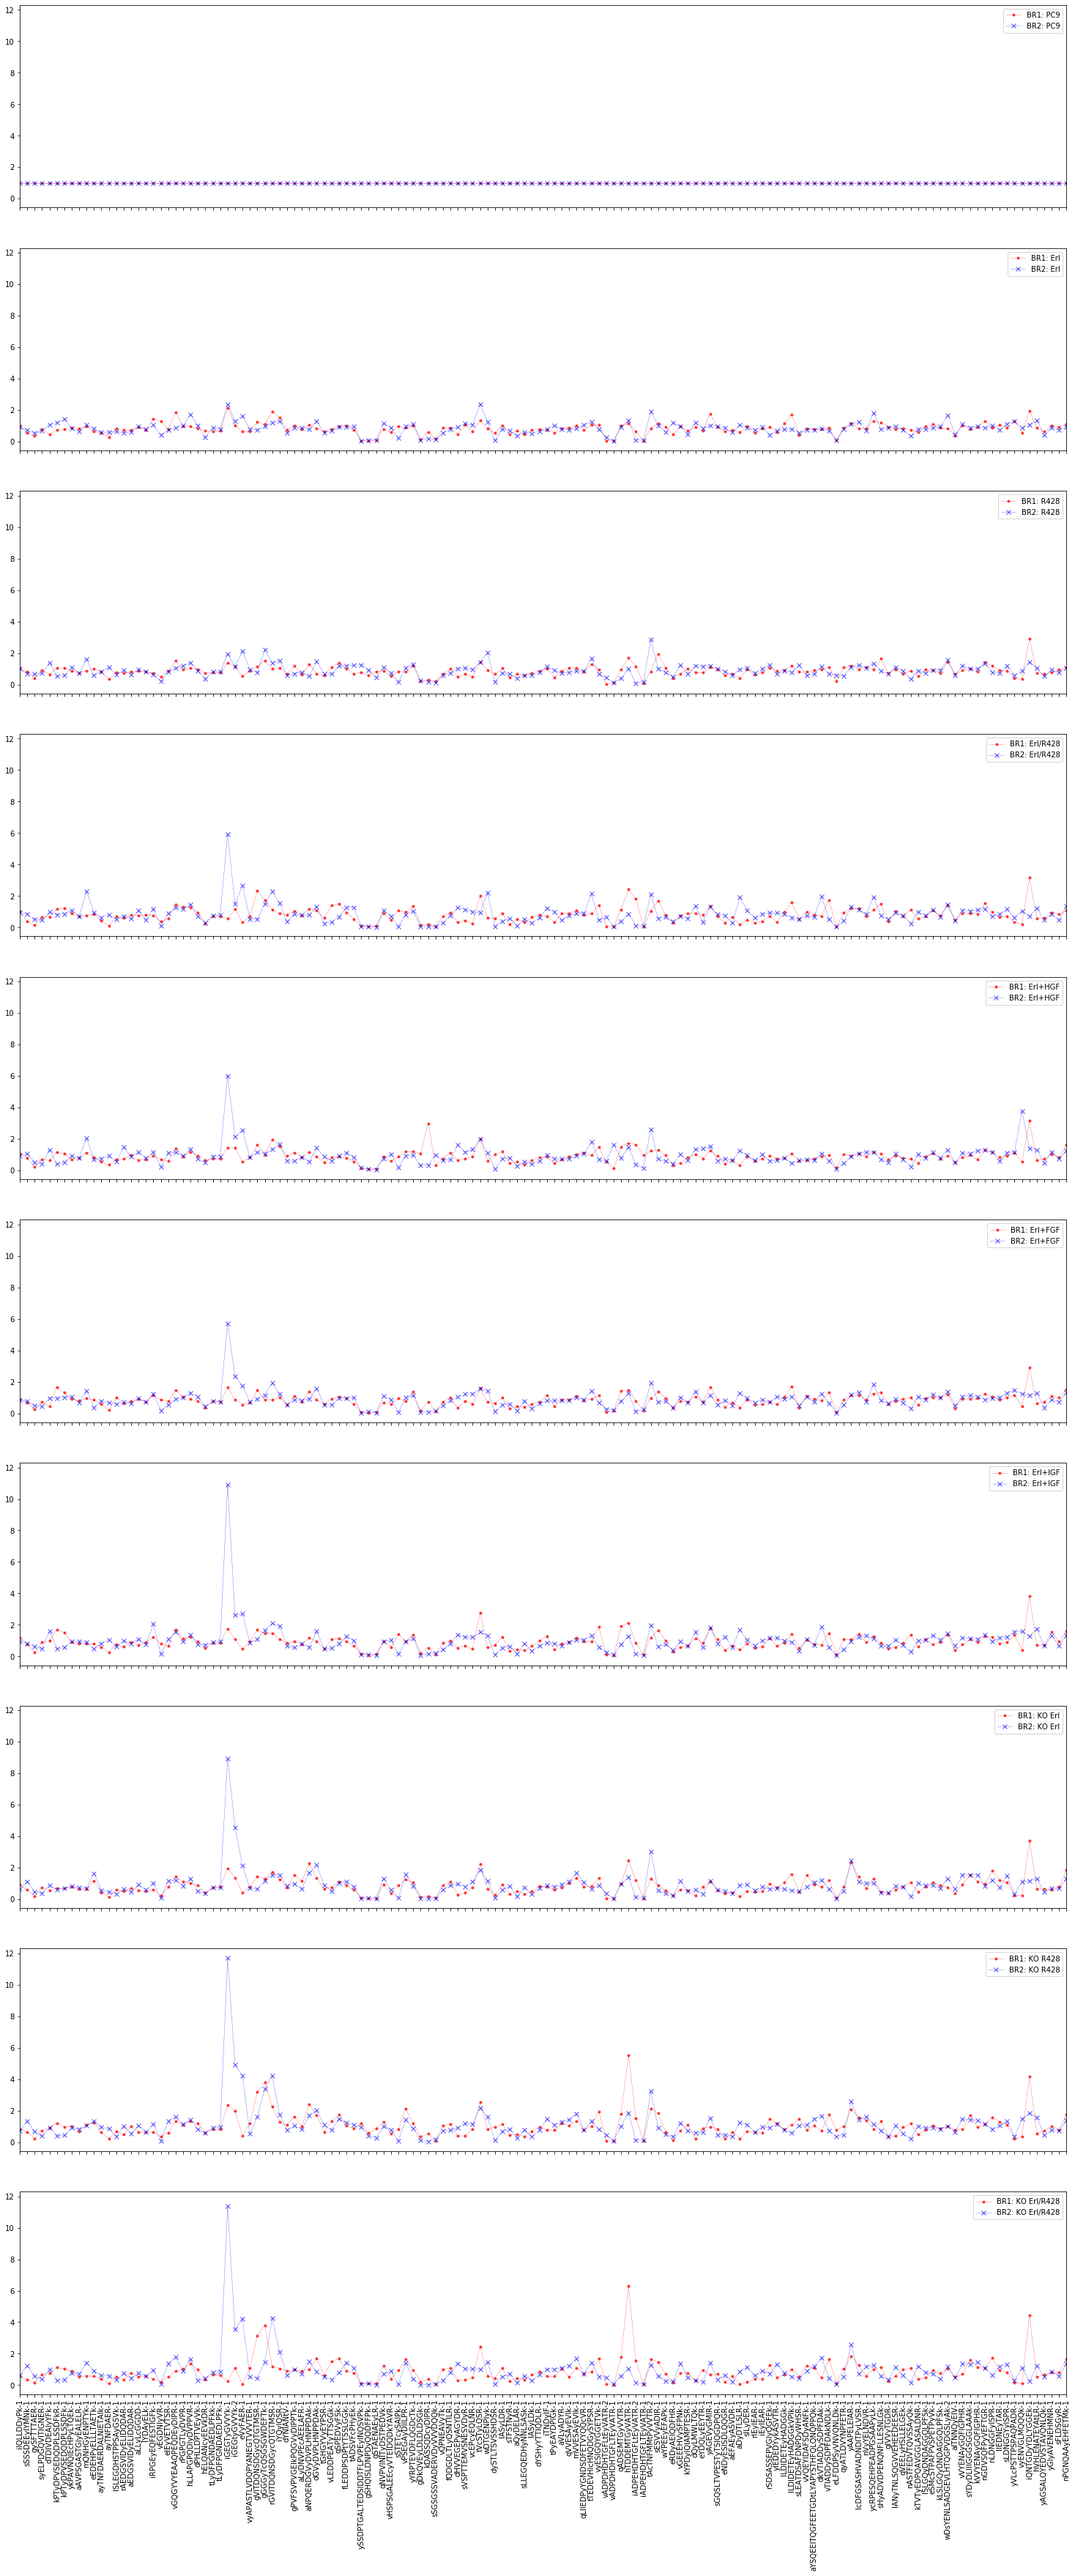

In [7]:
AvsB = AvsBacrossCond(A,B, t)

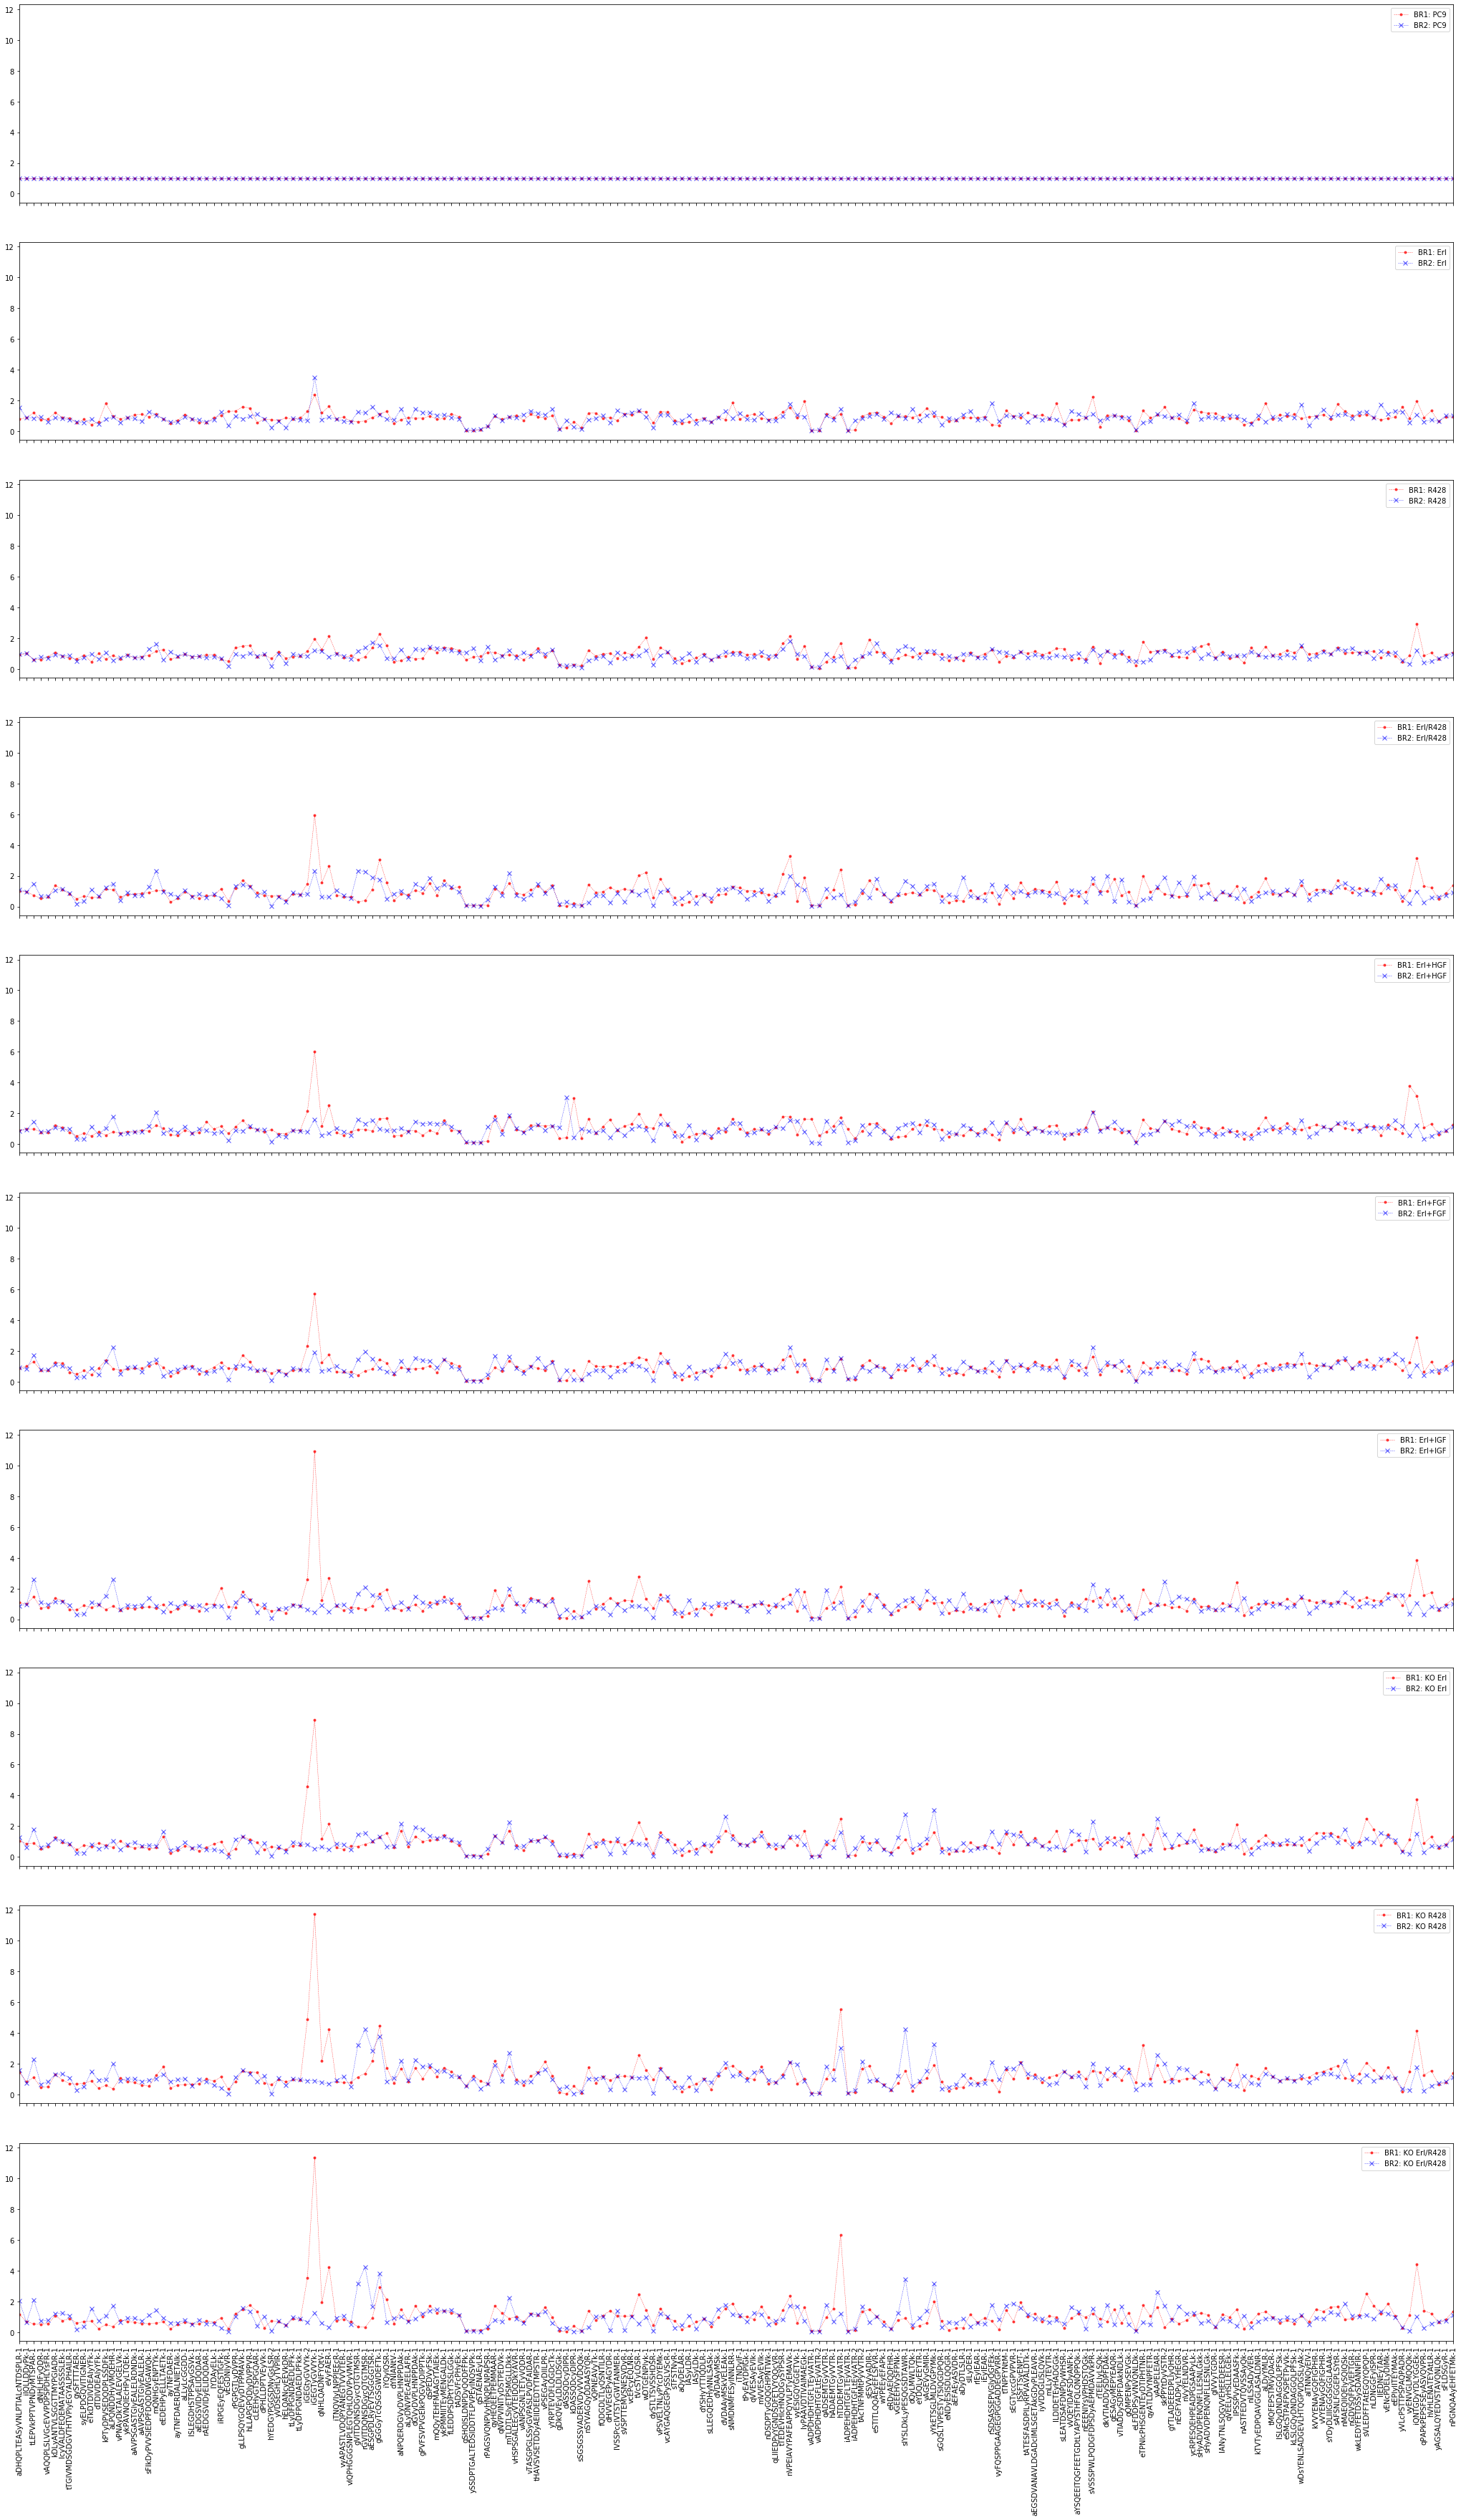

In [8]:
AvsC = AvsBacrossCond(A,C, t)

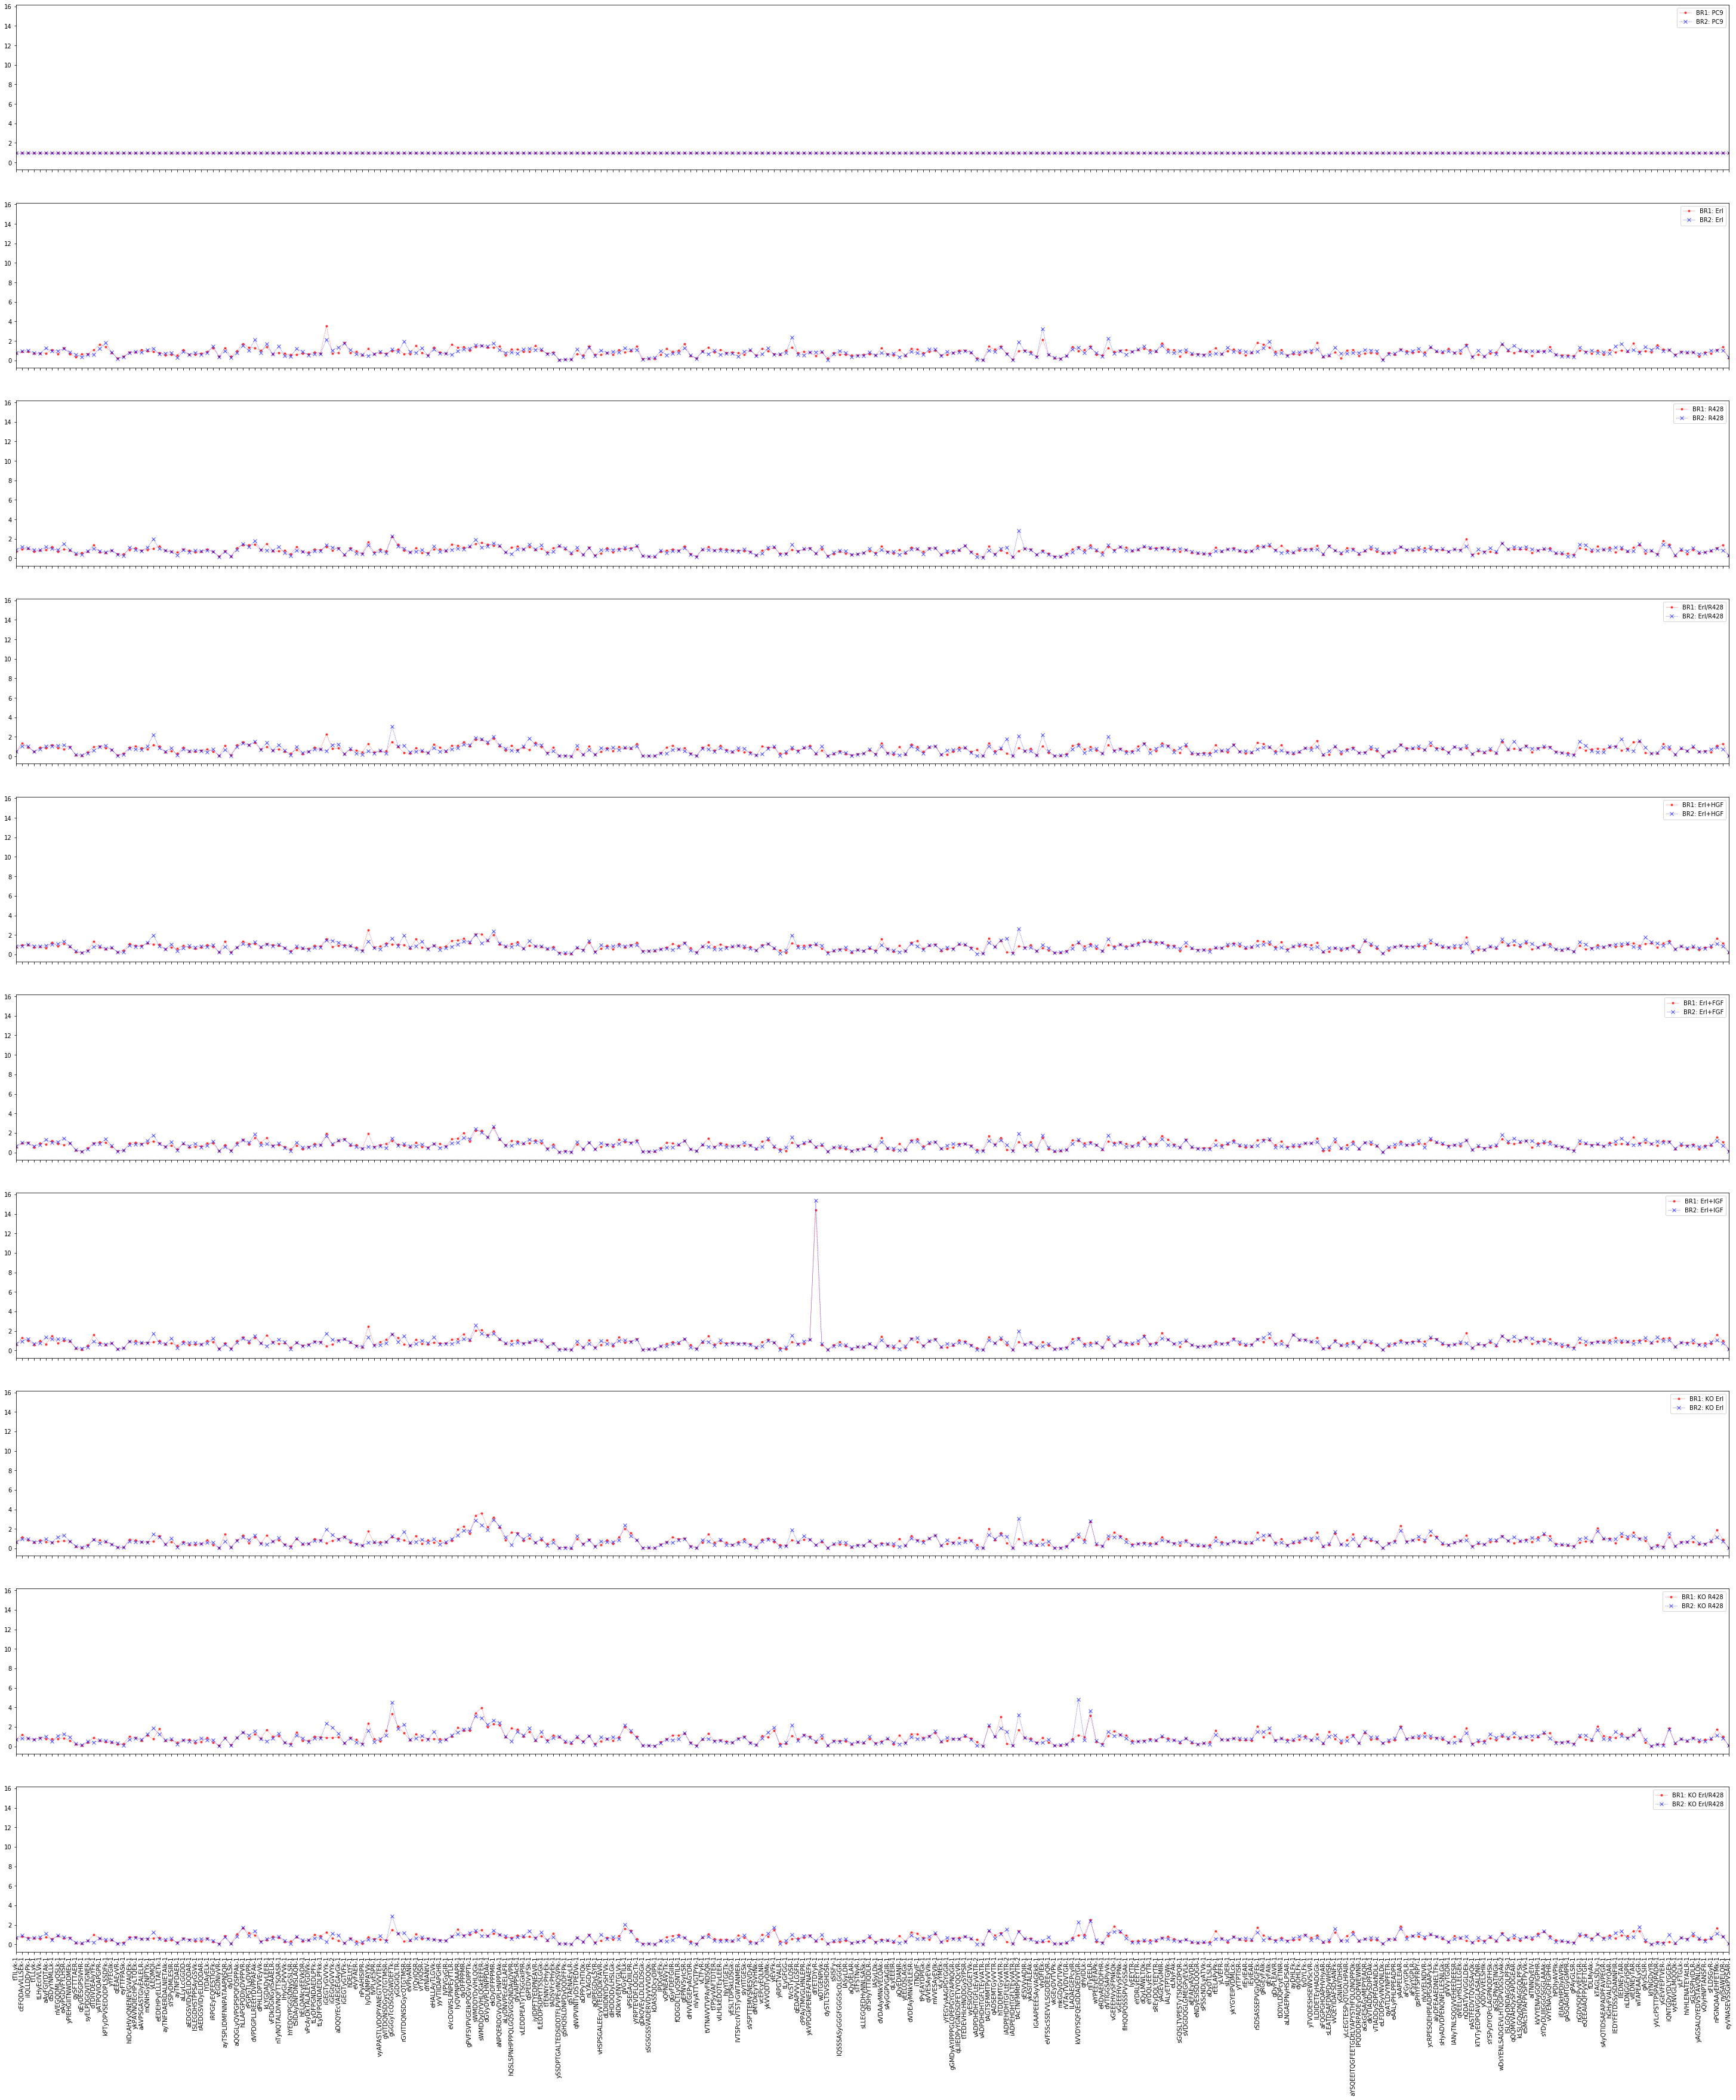

In [10]:
BvsC = AvsBacrossCond(B,C, t)

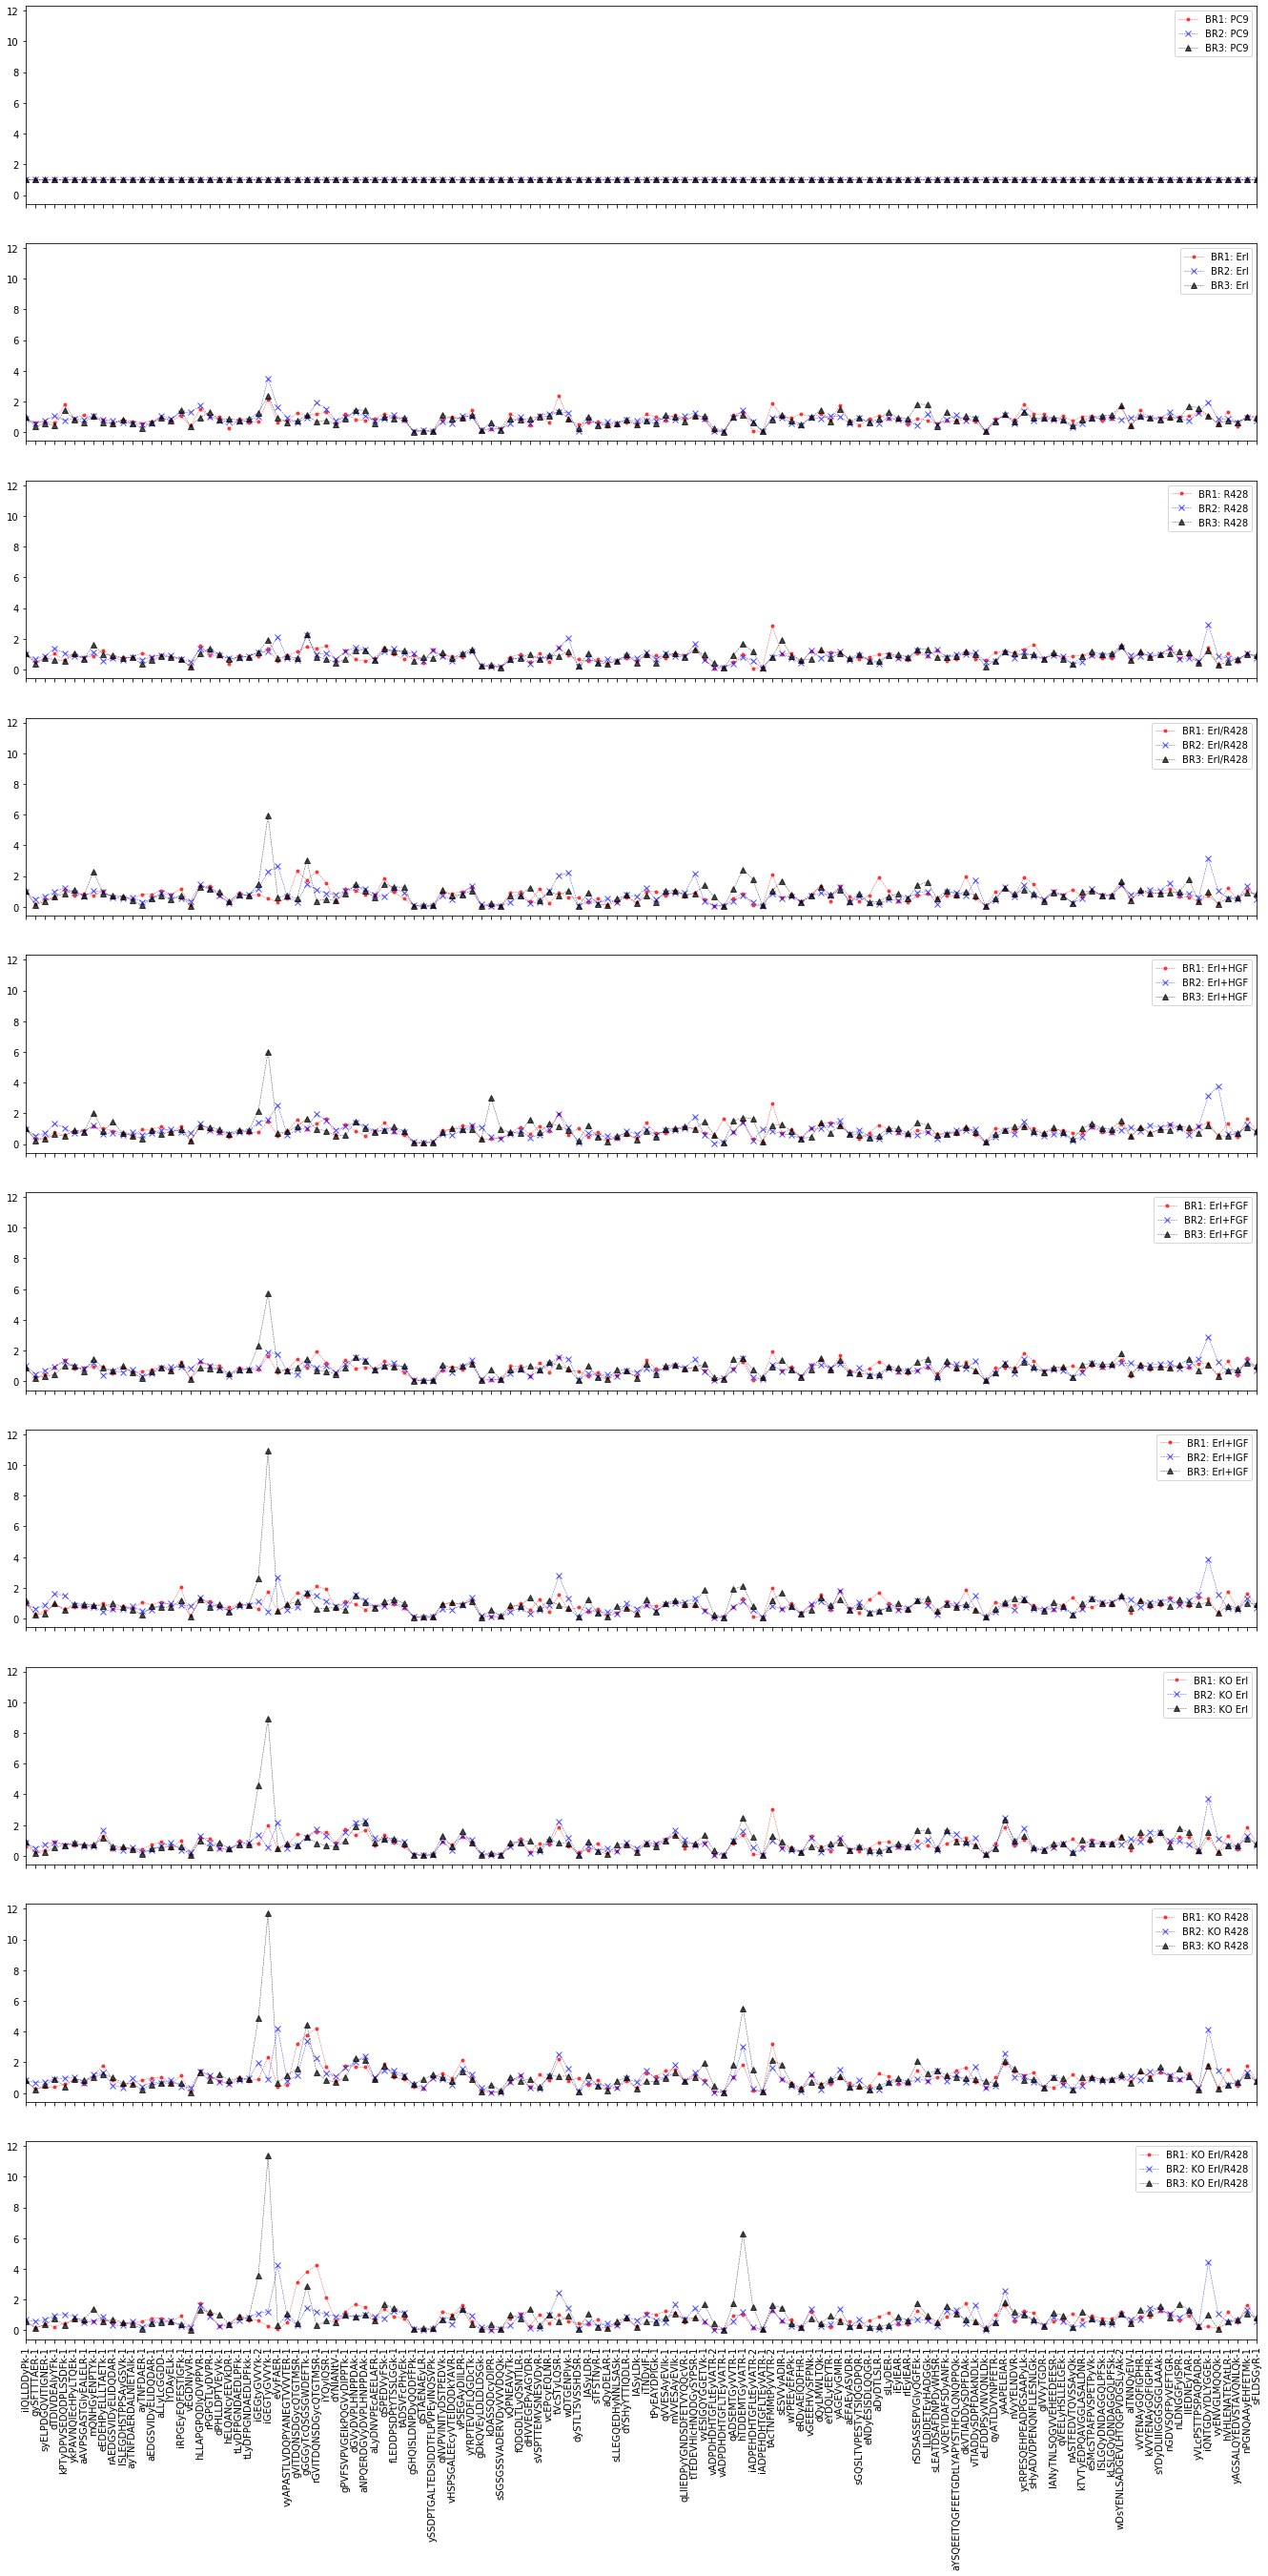

In [11]:
AvsBvsC = AvsBvsCacrossCond(A,B,C,t)